In [208]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score , recall_score , f1_score , precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [209]:
df = pd.read_csv("wine_classification/train.csv")
df1 = pd.read_csv("wine_classification/validation.csv")
df = pd.DataFrame(df)
df1 = pd.DataFrame(df1)
df = df.drop_duplicates()
df1 = df1.drop_duplicates()

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 957
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 87.0 KB


In [211]:
# X_train = df.drop("quality" , axis =1).values
# y_train = df["quality"].values

# X_val = df1.drop("quality" , axis =1).values
# y_val = df1["quality"].values

In [212]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,precision_score,recall_score
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train,y_train)
# log_y_pred = logistic_model.predict(X_val)

# accuracy = accuracy_score(y_val, log_y_pred)
# precision = precision_score(y_val, log_y_pred,average='weighted')
# recall = recall_score(y_val, log_y_pred,average='weighted')
# f1 = f1_score(y_val, log_y_pred,average='weighted')

# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")


In [213]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,precision_score,recall_score,confusion_matrix
# random_forest = RandomForestClassifier()
# random_forest.fit(X_train,y_train)
# rf_y_pred = random_forest.predict(X_val)

# accuracy = accuracy_score(y_val, rf_y_pred)
# precision = precision_score(y_val, rf_y_pred,average='weighted')
# recall = recall_score(y_val, rf_y_pred,average='weighted')
# f1 = f1_score(y_val, rf_y_pred,average='weighted')
# confusion_matrix = confusion_matrix(y_val, rf_y_pred)

# print(f"Accuracy: {accuracy:.2f}")      
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print(confusion_matrix)

In [214]:
print(df.quality.value_counts())
df['quality'] = df['quality'].apply(lambda x:1 if x>=6 else 0)
df1['quality'] = df1['quality'].apply(lambda x:1 if x>=6 else 0)

df = df.dropna(subset=['quality'])
df1 = df1.dropna(subset=['quality'])



quality
5    367
6    341
7    108
4     28
3      8
8      5
Name: count, dtype: int64


In [215]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.770,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,0
1,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,0
2,9.8,0.250,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.0,1
3,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3,1
4,7.1,0.720,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,0


In [216]:
df['fixed_density'] = df['fixed acidity'] * df['density']
df['free_total_sulfur'] = df['free sulfur dioxide'] * df['total sulfur dioxide']
df['fixed_pH'] = df['fixed acidity'] * df['pH']
df['citric_acidity'] = df['citric acid'] * df['fixed acidity']

df = df.drop(['citric acid' , 'density' , 'fixed acidity' , 'pH' , 'total sulfur dioxide' , 'free sulfur dioxide' ] , axis =1)


df1['fixed_density'] = df1['fixed acidity'] * df1['density']
df1['free_total_sulfur'] = df1['free sulfur dioxide'] * df1['total sulfur dioxide']
df1['fixed_pH'] = df1['fixed acidity'] * df1['pH']
df1['citric_acidity'] = df1['citric acid'] * df1['fixed acidity']

df1 = df1.drop(['citric acid' , 'density' , 'fixed acidity' , 'pH' , 'free sulfur dioxide' , 'total sulfur dioxide' ] , axis =1)

In [217]:
# numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# categorical_features = df1.select_dtypes(include=['object']).columns
# for feature in numerical_features:
#     print(f"skewness of {feature} for train = {df[feature].skew()}")
# print(" ")

# for feature in numerical_features:
#     print(f"skewness of {feature} for val = {df1[feature].skew()}")

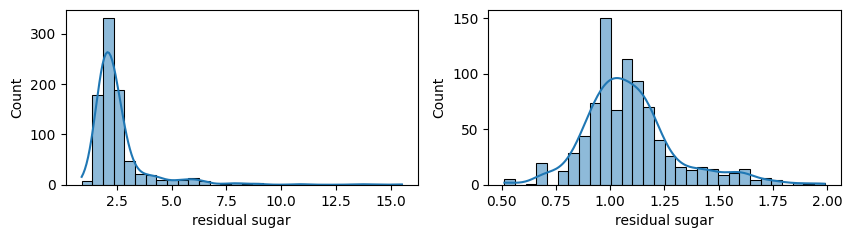

0.9205499797187213


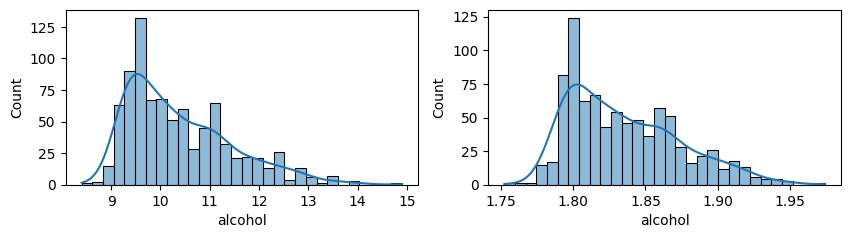

0.7146158065339909


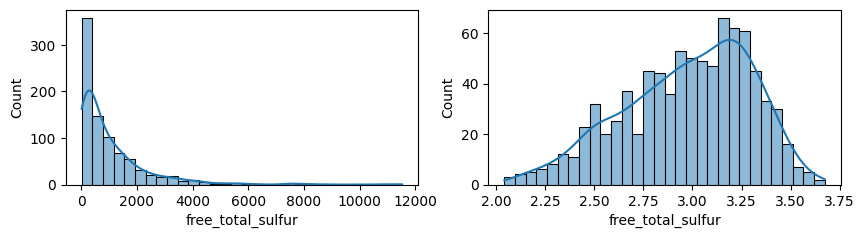

-0.4605258472079348


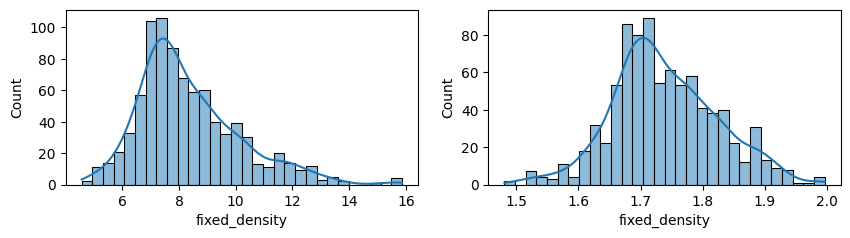

0.22100973025172996


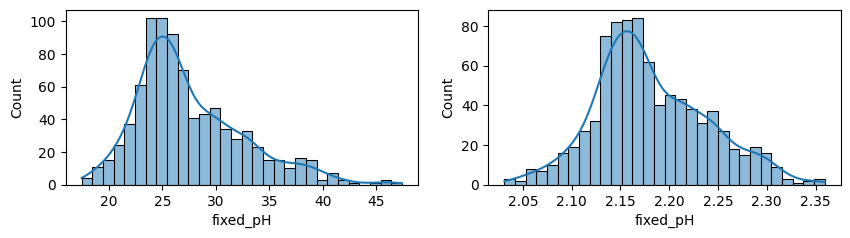

0.39944161247002274


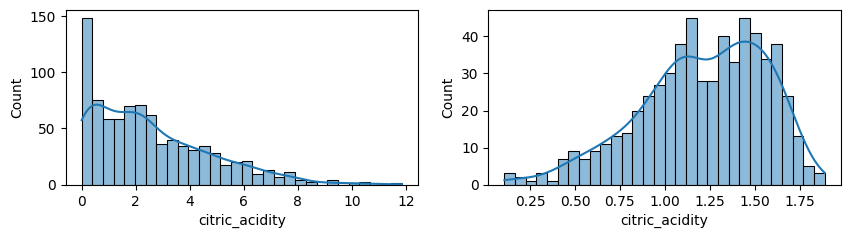

-0.592253067041872


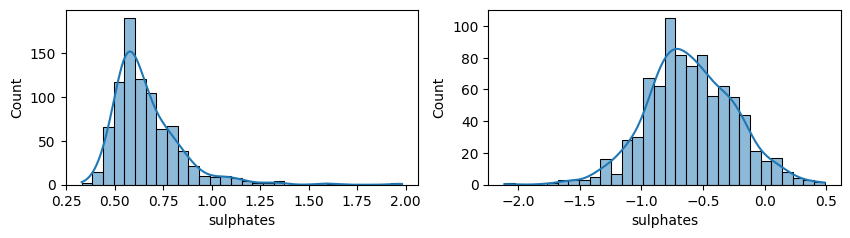

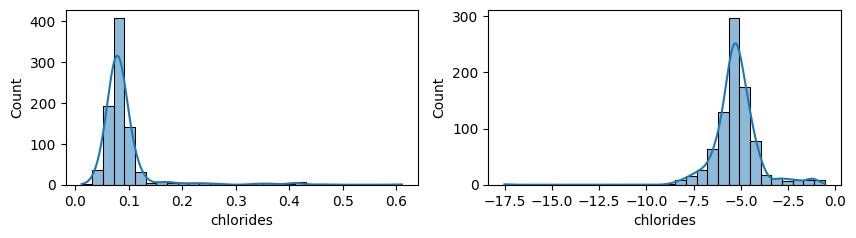

In [218]:
changes = ['residual sugar'  , 'alcohol' , 'free_total_sulfur' , 'fixed_density' , 'fixed_pH','citric_acidity']

for col in changes:

    plt.figure(figsize=(10, 5))
    plt.subplot(2,2,1)
    sns.histplot(data=df[col], bins=30, kde=True)


    df[col] = np.log2(df[col])
    df[col] = np.sqrt(df[col])
 
    df1[col] = np.log2(df1[col])
    df1[col] = np.sqrt(df1[col])


    plt.subplot(2,2,2)
    sns.histplot(data=df[col], bins=30, kde=True)
    plt.show()


    print(df[col].skew())


changes1 = ['sulphates' , 'chlorides']

for col in changes1:
    plt.figure(figsize=(10, 5))
    plt.subplot(2,2,1)
    sns.histplot(data=df[col], bins=30, kde=True)


    from scipy.stats import boxcox
    df[col],fitted_lambda = boxcox(df[col])
    df1[col] = boxcox(df1[col],fitted_lambda)

    plt.subplot(2,2,2)
    sns.histplot(data=df[col], bins=30, kde=True)
    plt.show()




In [219]:
# for col in df.columns:
#     sns.boxplot(data=df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [220]:
# for col in df1.columns:
#     sns.boxplot(data=df1[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [221]:
def calculate_z_scores(dfa, column):
    mean = dfa[column].mean()
    std_dev = dfa[column].std()
    z_scores = ((dfa[column] - mean) / std_dev).abs()
    return z_scores

columns_to_check = ['volatile acidity' ,'residual sugar', 'chlorides' , 'fixed_density','citric_acidity']
threshold = 3
for column in columns_to_check:
    z_scores = calculate_z_scores(df, column)
    df = df[z_scores < threshold]
    
for column in columns_to_check:
    z_scores = calculate_z_scores(df1, column)
    df1 = df1[z_scores < threshold]
    



In [222]:
# numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# for feature in numerical_features:
#     print(f"skewness of {feature} for train = {df[feature].skew()}")
# print(" ")

# for feature in numerical_features:
#     print(f"skewness of {feature} for val = {df1[feature].skew()}")

In [223]:
def impute_outliers(df, column):
    Q1 = df[column].quantile(0.2)
    Q3 = df[column].quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].mean()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

columns_to_check = ['chlorides','residual sugar']

for column in columns_to_check:
    df = impute_outliers(df, column)
    df1 = impute_outliers(df1, column)

In [224]:
# Encode labels for training
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df1['quality'] = le.fit_transform(df1['quality'])

In [225]:
X_train = df.drop(["quality"]  , axis =1).values
y_train = df["quality"].values


X_val = df1.drop("quality" , axis =1).values
y_val = df1["quality"].values


In [226]:
print(df.shape,df1.shape)

(564, 10) (194, 10)


In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
import pickle
with open('scaler_q.pkl','wb') as file:
    scaler = pickle.dump(scaler,file)

In [228]:
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler with default range [0, 1]
scaler = MinMaxScaler()

# Selecting the specific features to scale
features_to_scale = ['chlorides', 'sulphates']

# Fitting the scaler and transforming the data
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

# Display the first few rows to verify the scaling
print(df.head())


   volatile acidity  residual sugar  chlorides  sulphates   alcohol  quality  \
1             0.580        1.123848   0.421792   0.413406  1.830436        0   
2             0.250        1.197063   0.565533   0.706134  1.822616        1   
3             0.625        1.107321   0.565533   0.755971  1.932189        1   
5             0.370        1.000000   0.565533   0.398576  1.863461        1   
6             0.460        1.066538   0.385482   0.367277  1.780428        1   

   fixed_density  free_total_sulfur  fixed_pH  citric_acidity  
1       1.692121           3.112595  2.158395        1.063452  
2       1.813886           2.991870  2.250950        1.504538  
3       1.873294           2.677672  2.268893        1.706312  
5       1.800648           3.042596  2.228456        1.518062  
6       1.929594           2.951990  2.314030        1.667048  


In [229]:
from sklearn.linear_model import LogisticRegression
import evaluation
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled,y_train)
log_y_pred = logistic_model.predict(X_val_scaled)



metrics = evaluation.evaluate_classification(y_val,log_y_pred)
for metric, value in metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}:\n{value}")

Accuracy: 0.7423
Precision: 0.7411
Recall: 0.7423
F1 Score: 0.7414
Confusion Matrix:
[[56 27]
 [23 88]]


In [230]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled,y_train)
random_y_pred = random_forest.predict(X_val_scaled)


metrics = evaluation.evaluate_classification(y_val,random_y_pred)
for metric, value in metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}:\n{value}")

Accuracy: 0.8247
Precision: 0.8244
Recall: 0.8247
F1 Score: 0.8238
Confusion Matrix:
[[63 20]
 [14 97]]


In [231]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train_scaled,y_train)
ada_y_pred = ada_boost.predict(X_val_scaled)

metrics = evaluation.evaluate_classification(y_val,ada_y_pred)
for metric, value in metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}:\n{value}")



Accuracy: 0.7680
Precision: 0.7677
Recall: 0.7680
F1 Score: 0.7679
Confusion Matrix:
[[60 23]
 [22 89]]


In [232]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_scaled,y_train)
svm_y_pred = svm_model.predict(X_val_scaled)

metrics = evaluation.evaluate_classification(y_val,svm_y_pred)
for metric, value in metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}:\n{value}")

Accuracy: 0.7371
Precision: 0.7375
Recall: 0.7371
F1 Score: 0.7373
Confusion Matrix:
[[58 25]
 [26 85]]


In [233]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the models
gradient_boost = GradientBoostingClassifier(random_state=42)
gradient_boost.fit(X_train_scaled,y_train)
gradient_y_pred = gradient_boost.predict(X_val_scaled)

metrics = evaluation.evaluate_classification(y_val,gradient_y_pred)
for metric, value in metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}:\n{value}")

Accuracy: 0.7990
Precision: 0.7983
Recall: 0.7990
F1 Score: 0.7985
Confusion Matrix:
[[62 21]
 [18 93]]


In [234]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import  SVC

# Initialize the models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

# Define a list of models
models = [log_reg, random_forest, gradient_boost, svc, knn, naive_bayes]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Classifier', 'K-Nearest Neighbors', 'Naive Bayes']


In [235]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Store evaluation metrics for comparison
results = []

for model, name in zip(models, model_names):
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, y_train, X_val_scaled, y_val)
    results.append((name, accuracy, precision, recall, f1))
    print(f'{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')


Logistic Regression - Accuracy: 0.7423, Precision: 0.7411, Recall: 0.7423, F1-score: 0.7414
Random Forest - Accuracy: 0.8196, Precision: 0.8194, Recall: 0.8196, F1-score: 0.8184
Gradient Boosting - Accuracy: 0.7990, Precision: 0.7983, Recall: 0.7990, F1-score: 0.7985
Support Vector Classifier - Accuracy: 0.7371, Precision: 0.7375, Recall: 0.7371, F1-score: 0.7373
K-Nearest Neighbors - Accuracy: 0.7268, Precision: 0.7251, Recall: 0.7268, F1-score: 0.7250
Naive Bayes - Accuracy: 0.7680, Precision: 0.7705, Recall: 0.7680, F1-score: 0.7688


In [236]:
# Select the best model based on F1-score
best_model_name, best_accuracy, best_precision, best_recall, best_f1 = max(results, key=lambda x: x[4])
print(f'\nBest Model: {best_model_name} - Accuracy: {best_accuracy:.4f}, Precision: {best_precision:.4f}, Recall: {best_recall:.4f}, F1-score: {best_f1:.4f}')

# Train the best model on the entire training dataset
best_model = [model for model, name in zip(models, model_names) if name == best_model_name][0]
best_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred = best_model.predict(X_val_scaled)

# Calculate evaluation metrics on the validation set
accuracy_val = accuracy_score(y_val, y_pred)
precision_val = precision_score(y_val, y_pred, average='weighted')
recall_val = recall_score(y_val, y_pred, average='weighted')
f1_val = f1_score(y_val, y_pred, average='weighted')

print(f' test - Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1-score: {f1_val:.4f}')



Best Model: Random Forest - Accuracy: 0.8196, Precision: 0.8194, Recall: 0.8196, F1-score: 0.8184


 test - Accuracy: 0.8196, Precision: 0.8194, Recall: 0.8196, F1-score: 0.8184


In [237]:
# Save the model to a pickle file
import pickle
with open('q_random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [238]:
import pickle
with open('wine_quality_gradient.pkl', 'wb') as file:
    pickle.dump(gradient_boost, file)

print("Model saved as 'gradient boost.pkl'")

Model saved as 'gradient boost.pkl'


In [239]:
import pickle
with open('quality_naive.pkl', 'wb') as file:
    pickle.dump(naive_bayes, file)

print("Model saved as 'naive bayes.pkl'")

Model saved as 'naive bayes.pkl'


In [240]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42))  # AdaBoost
]

# Define meta-model
meta_model = LogisticRegression()

# Create and train the stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_val_scaled)
metrics = evaluation.evaluate_classification(y_val,gradient_y_pred)
for metric, value in metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}:\n{value}")

Accuracy: 0.7990
Precision: 0.7983
Recall: 0.7990
F1 Score: 0.7985
Confusion Matrix:
[[62 21]
 [18 93]]


In [241]:
import pickle
with open('quality_stacking.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)

print("Model saved as 'stacking boost.pkl'")

Model saved as 'stacking boost.pkl'
